In [35]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [36]:
df=pd.read_csv("Combined Data.csv")
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [76]:
df.groupby("status").describe()

statement         \
                         count unique   
status                                  
Anxiety                   3841   3623   
Bipolar                   2777   2501   
Depression               15404  15094   
Normal                   16343  16040   
Personality disorder      1077    895   
Stress                    2587   2296   
Suicidal                 10652  10644   

                                                                              
                                                                    top freq  
status                                                                        
Anxiety               "No regrets or grudges/angry at things that ha...    5  
Bipolar               Clean and taking my meds. I took y'all's advic...    2  
Depression            being border restricted victim day by day we g...    8  
Normal                                                what do you mean?   22  
Personality disorder  how to get over fear of therapy/getting help i...    4  
Stress                Survey on Situational Stress and Music (18 and...   10  
Suicidal              I am a 15 year old Colombian boy, living in Eu...    2

In [37]:
df=df.drop(["Unnamed: 0"],axis=1)

In [41]:
df.dropna(inplace=True)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     52681 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [43]:
df["status"].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [44]:
x=df.statement
y=df.status

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
x_tra=count.fit_transform(x_train.values)

In [64]:
naive=MultinomialNB()
naive.fit(x_tra,y_train)

MultinomialNB()

In [66]:
naive.predict(x_tra)

array(['Normal', 'Depression', 'Depression', ..., 'Depression',
       'Suicidal', 'Normal'], dtype='<U20')

In [67]:
sentense=["It feels uneasy.",
         "I play football today.",
          "car busted, $20 in my bank account, cannot get to work to pay for food or bills, live alone, no gf no family, ugly n a virgin at 20, game over I guessFuck society, the game was rigged from the start but I gave it my bestHasta la Victoria siempre end of the line"

]
vec_sen=count.transform(sentense)
naive.predict(vec_sen)

array(['Anxiety', 'Normal', 'Suicidal'], dtype='<U20')

In [68]:
x_test=count.transform(x_test)
naive.score(x_test,y_test)


0.6528423649995255

In [57]:
y_predicted=naive.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix
ce=confusion_matrix(y_test,y_predicted)

In [60]:
ce

array([[ 591,   21,  150,   20,    1,    6,    4],
       [  32,  329,  174,    2,    3,    3,    3],
       [  83,   59, 2072,   61,    1,    4,  756],
       [  79,   20,  869, 2128,    5,   32,  152],
       [   4,    4,  145,    4,   32,    0,    3],
       [  66,   21,  303,    5,    0,  133,    7],
       [   8,    8,  501,   31,    0,    6, 1596]], dtype=int64)

<Axes: >

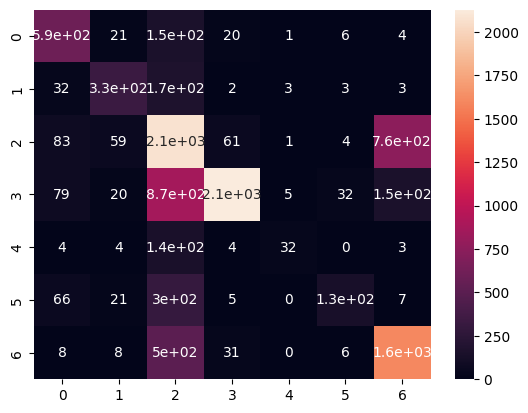

In [61]:
sns.heatmap(ce,annot=True)

In [70]:
from sklearn.metrics import classification_report
ce=classification_report(y_test,y_predicted)

In [72]:
print(ce)

                      precision    recall  f1-score   support

             Anxiety       0.07      0.08      0.08       794
             Bipolar       0.05      0.04      0.04       537
          Depression       0.28      0.39      0.33      3034
              Normal       0.31      0.21      0.25      3365
Personality disorder       0.00      0.00      0.00       224
              Stress       0.03      0.01      0.02       480
            Suicidal       0.19      0.23      0.21      2103

            accuracy                           0.23     10537
           macro avg       0.13      0.14      0.13     10537
        weighted avg       0.23      0.23      0.22     10537



In [73]:
naive.predict_proba(x_tra)

array([[1.30337533e-09, 5.28569774e-07, 8.51415907e-04, ...,
        3.90268444e-09, 2.85166725e-06, 4.83011006e-08],
       [5.11768886e-04, 1.66863126e-03, 9.95039336e-01, ...,
        1.76666401e-04, 1.43233370e-03, 9.06283375e-05],
       [2.12697472e-11, 5.77805814e-10, 9.99996859e-01, ...,
        3.23584383e-11, 4.99669100e-12, 3.14051585e-06],
       ...,
       [8.22635914e-39, 2.75273798e-26, 5.08900657e-01, ...,
        1.09946152e-32, 1.17510184e-36, 4.91099343e-01],
       [6.74309893e-27, 2.53231838e-19, 8.73878932e-17, ...,
        9.75184066e-32, 3.23203544e-19, 1.00000000e+00],
       [8.05907565e-04, 1.04980488e-03, 2.36872611e-02, ...,
        9.27946411e-06, 3.10385043e-04, 1.94871411e-02]])